# Sentiment analysis
After cleaning the data and finding the top words for the period of time, a sentiment analysis can be made. The analysis is used to inpect the data for words for their polarity and subjectivity. To do this, a natrual language processing library named [TextBlob](https://textblob.readthedocs.io/en/dev/) is used. Particular its [sentiment function](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis).   

**Polarity** is how positive or negative a word is. This is weighted as -1 for very negative and +1 for very positive.  
**Subjectivity** is how opinionated a word is. Here 0 is a fact, +1 is a opinion.

In [26]:
# Importing neccesary packages and the data from the pickle file.
import pandas as pd

data = pd.read_pickle("pickle/data_clean_r4.pkl")
data_with_more_labels = pd.read_pickle("pickle/data_df.pkl")
data_with_more_labels = data_with_more_labels.drop(columns="content")
data = data.join(data_with_more_labels)
data.head(5)
#data_with_more_labels.head(5)


,content,title,date,domain,url,author,topic_area
0,so sorry to tell you that you have stage ovari...,My experience of surviving cancer twice,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,Helen Ziatyk,healthcare
1,if you buy something through link on this page...,Ginger: Health benefits and dietary tips,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/2659...,Jenna Fletcher,healthcare
2,cluster of more than pneumonia in the central ...,China pneumonia outbreak may be caused by Sars...,2020-01-08,theguardian,https://www.theguardian.com/science/2020/jan/0...,Reuters,general
3,at hong international airport are being for my...,New virus identified as likely cause of myster...,2020-01-08,nature,https://www.nature.com/articles/d41586-020-000...,nature,science
4,the finding that the outbreak of viral pneumon...,China's Sars-like illness worries health exper...,2020-01-09,theguardian,https://www.theguardian.com/world/2020/jan/09/...,https://www.theguardian.com/profile/sarahboseley,general


In [27]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['content'].apply(pol)
data['subjectivity'] = data['content'].apply(sub)
data.head(5)

,content,title,date,domain,url,author,topic_area,polarity,subjectivity
0,so sorry to tell you that you have stage ovari...,My experience of surviving cancer twice,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,Helen Ziatyk,healthcare,0.097308,0.451579
1,if you buy something through link on this page...,Ginger: Health benefits and dietary tips,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/2659...,Jenna Fletcher,healthcare,0.131044,0.519160
2,cluster of more than pneumonia in the central ...,China pneumonia outbreak may be caused by Sars...,2020-01-08,theguardian,https://www.theguardian.com/science/2020/jan/0...,Reuters,general,0.090905,0.521881
3,at hong international airport are being for my...,New virus identified as likely cause of myster...,2020-01-08,nature,https://www.nature.com/articles/d41586-020-000...,nature,science,0.069797,0.497991
4,the finding that the outbreak of viral pneumon...,China's Sars-like illness worries health exper...,2020-01-09,theguardian,https://www.theguardian.com/world/2020/jan/09/...,https://www.theguardian.com/profile/sarahboseley,general,0.102852,0.490368


# Sentiment over time
Looking at how the sentiment has changed over time.

In [29]:
# Setting the data to group the date by weekly time.
data_weekly = data
data_weekly["date"] = pd.to_datetime(data["date"]).dt.strftime("%W")
data_weekly = data_weekly.groupby("date", as_index=False, sort=False).mean()
data_weekly.head(5)

,date,polarity,subjectivity
0,00,0.114176,0.485370
1,01,0.092348,0.486258
2,02,0.066919,0.414863
3,03,0.087684,0.416945
4,04,0.080450,0.412676


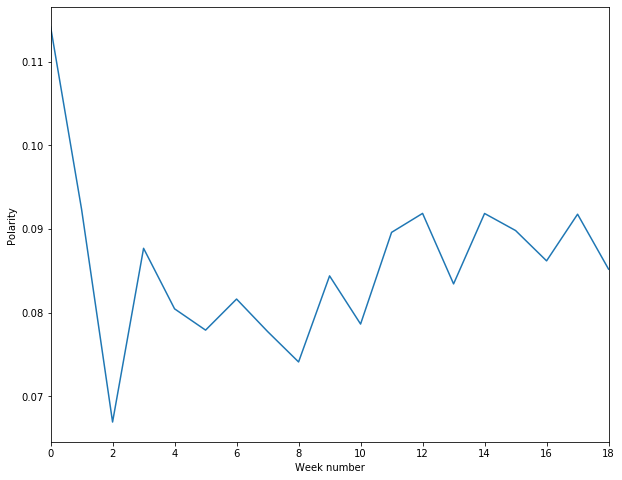

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

# Plotting the polartiy
data_weekly["polarity"].plot(kind="line", x="date")
plt.xlabel("Week number")
plt.ylabel("Polarity")
plt.show()

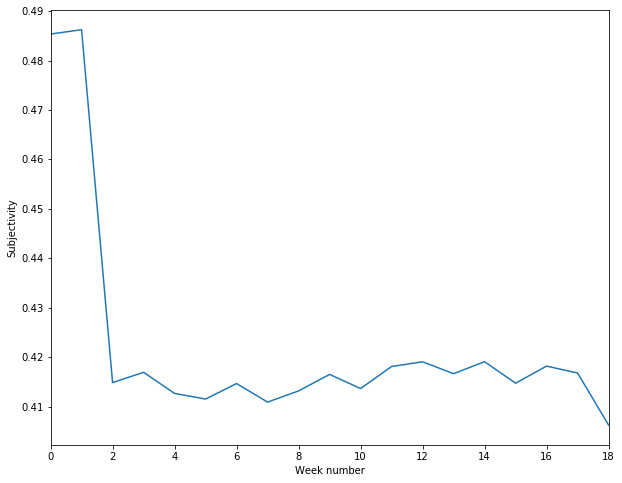

In [31]:
# Plotting the subjectiviy
data_weekly["subjectivity"].plot(kind="line", x="date")
plt.xlabel("Week number")
plt.ylabel("Subjectivity")
plt.show()